# Household Finance Analysis

In [1]:
import pandas as pd
import re

df = pd.read_csv("household-finances3.csv", parse_dates=["date"], infer_datetime_format=True, dayfirst=True)
df["date"]

0     2020-05-06
1     2020-08-24
2     2020-08-24
3     2020-06-25
4     2020-04-17
         ...    
529   2020-07-05
530   2020-07-14
531   2020-09-17
532   2020-10-29
533   2020-11-05
Name: date, Length: 534, dtype: datetime64[ns]

In [2]:
df["desc"].value_counts()

EFTPOS CALLALA BAY HOLDING\DAVIDSON  AU                                 80
CALLALA BAY HOLDINGS  CALLALA BAY                                       37
EZI*Kemps MA  South Nowra                                               35
CALLALA BAY HOLDINGS  DAVIDSON                                          33
PAYMENT TO DONNICI MP/WOOD CA                                           32
                                                                        ..
CALVIN HSIEH  WOLLONGONG                                                 1
SHREE PETROLEUM PTY   CULBURRA BEAC                                      1
ANZ INTERNET BANKING FUNDS TFER TRANSFER 824798  TO 4564680025696732     1
COLES EXPRESS  2016   South Nowra                                        1
TARGETC 6375  NOWRA                                                      1
Name: desc, Length: 159, dtype: int64

In [3]:
df.groupby("desc").sum()

,amount
desc,
ANZ INTERNET BANKING BPAY ORIGIN ENERGY {274447},-465.13
ANZ INTERNET BANKING BPAY ORIGIN ENERGY {817996},-509.99
ANZ INTERNET BANKING BPAY SCC {818203},-1591.32
ANZ INTERNET BANKING BPAY SHOALHAVEN WATER {169196},-313.32
ANZ INTERNET BANKING BPAY SHOALHAVEN WATER {938841},-389.50
...,...
WOOLWORTHS 1436 CULBURRA BEAC,-583.59
WOOLWORTHS 1641 BOMADE BOMADERRY,-54.20
WOOLWORTHS 1648 NOWRA,-101.25


In [4]:
# tuples contain: (pattern, replacement, category)
categories = [
    # Groceries
    ("CALLALA BAY HOLDING", "IGA", "GROCERIES"), 
    ("WOOLWORTHS", "WOOLWORTHS", "GROCERIES"),
    ("COLES", "COLES", "GROCERIES"),
    ("NOWRA FARMERS MARKET", "NOWRA FRESH", "GROCERIES"), 
    ("NFM CO", "NOWRA FRESH", "GROCERIES"), 
    ("NOWRA FRESH", "NOWRA FRESH", "GROCERIES"),
    ("BAY VILLAGES MEATS", "BUTCHER", "GROCERIES"),
    ("CELLARS", "BOOZE", "GROCERIES"),
    ("BAKEHOUSE", "BAKERY", "GROCERIES"),
    
    # Eating Out
    ("SUSHI", "SUSHI", "EATING OUT"),
    
    # Activities
    ("KEMPS", "KEMPS", "ACTIVITIES"),
    ("DANCE", "DANCE", "ACTIVITIES"),
    ("BCF NOWRA", "BCF", "ACTIVITIES"),
    
    # Utilities
    ("ORIGIN ENERGY", "ENERGY", "UTILITIES"), 
    ("SHOALHAVEN WATER", "WATER", "UTILITIES"), 
    ("TARRANTS GAS", "GAS", "UTILITIES"), 
    ("Telstra", "TELSTRA", "UTILITIES"), 
    
    # Health
    ("PHARMACY", "PHARMACY", "HEALTH"),
    ("CHEMIST", "PHARMACY", "HEALTH"), 
    ("HEALTH", "HEALTH", "HEALTH"),
    ("GO VITA", "GO VITA", "HEALTH"),
    ("TRANSFER FROM ALLIANZ", "HEALTH", "HEALTH"),
    ("TRANSFER FROM MCARE", "HEALTH", "HEALTH"),
    ("TRANSFER FROM AAI", "HEALTH", "HEALTH"),
    
    # Dog
    ("VETERINARY", "VET", "DOG"),
    ("PARADISE PET PARKS", "KENNEL", "DOG"),
    
    # General Household
    ("JOYCE MAYNE", "JOYCE MAYNE", "HOUSEHOLD"),
    ("HARVEY NORMAN", "HARVEY NORMAN", "HOUSEHOLD"),
    ("KMART", "KMART", "HOUSEHOLD"),
    ("TARGET", "TARGET", "HOUSEHOLD"),
    ("OFFICEWORKS", "OFFICEWORKS", "HOUSEHOLD"),
    ("OFWKS", "OFFICEWORKS", "HOUSEHOLD"),
    ("GOOGLE", "GOOGLE", "HOUSEHOLD"),
    ("SPOTIFY", "SPOTIFY", "HOUSEHOLD"),
    
    # Cars
    ("NRMA", "NRMA", "CARS"),
    ("CALTEX", "FUEL", "CARS"),
    ("EFTPOS UNITED", "FUEL", "CARS"),
    ("BP STH NOWRA", "FUEL", "CARS"),
    ("AMPOL", "FUEL", "CARS"),
    ("MOBIL", "FUEL", "CARS"),
    ("PETROLEUM", "FUEL", "CARS"),
    ("GIO CTP", "GIO", "CARS"),
    ("SERVICE NSW", "SERVICE NSW", "CARS"),
    
    # Mortgage
    ("PAYMENT TO DONNICI MP", "MORTGAGE", "MORTGAGE"),
    
    # Income
    ("DET SALARY", "CW INCOME", "INCOME"),
    ("TRANSFER FROM MICHAEL DONNICI", "MD INCOME", "INCOME"),
]

df["category"] = pd.Series(dtype="str")
for cat in categories:
    rgx = fr"(?=.*{cat[0]}.*)(.*)"
    s = df["desc"].str.replace(rgx, cat[1], flags=re.I)
    df["desc"] = s.combine_first(df["desc"])
    df.loc[df["desc"] == cat[1], "category"] = cat[2]
    
df.groupby("category").sum().abs()

,amount
category,
ACTIVITIES,2377.65
CARS,3267.66
DOG,320.90
EATING OUT,60.18
GROCERIES,11541.73
HEALTH,4194.02
HOUSEHOLD,2715.34
INCOME,74900.00
MORTGAGE,20800.00


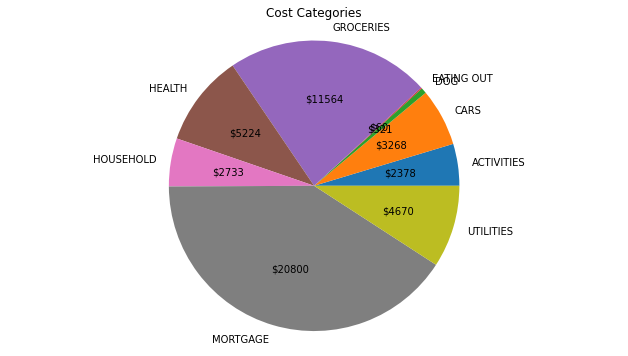

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plotdf = df[df["amount"]<0].groupby("category").sum().abs()
values = plotdf["amount"]
labels = plotdf.index
amount_sum = plotdf["amount"].sum()

def dollar_value(val):
    return f"${int(np.round(val/100*amount_sum))}"

fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(values, labels=plotdf.index, autopct=dollar_value)
ax1.axis('equal')
plt.title('Cost Categories')
plt.show()

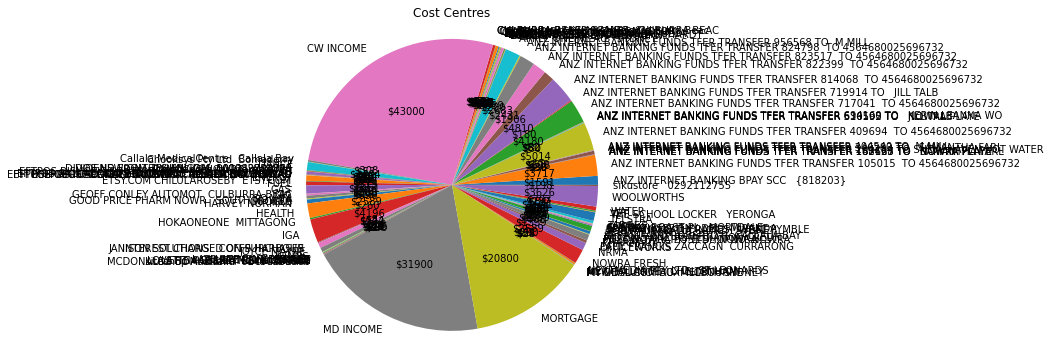

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plotdf = df.groupby("desc").sum().abs()
values = plotdf["amount"]
labels = plotdf.index
amount_sum = plotdf["amount"].sum()

def dollar_value(val):
    return f"${int(np.round(val/100*amount_sum))}"

fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(values, labels=plotdf.index, autopct=dollar_value)
ax1.axis('equal')
plt.title('Cost Centres')
plt.show()

In [7]:
df["in"] = df[df["amount"] > 0]["amount"]
df["out"] = df[df["amount"] < 0]["amount"]
df.groupby("category").sum().abs()
# df.groupby("date").sum()["amount"].plot.line()

,amount,in,out
category,,,
ACTIVITIES,2377.65,0.00,2377.65
CARS,3267.66,0.00,3267.66
DOG,320.90,0.00,320.90
EATING OUT,60.18,0.00,60.18
GROCERIES,11541.73,22.49,11564.22
HEALTH,4194.02,1030.42,5224.44
HOUSEHOLD,2715.34,18.00,2733.34
INCOME,74900.00,74900.00,0.00
MORTGAGE,20800.00,0.00,20800.00


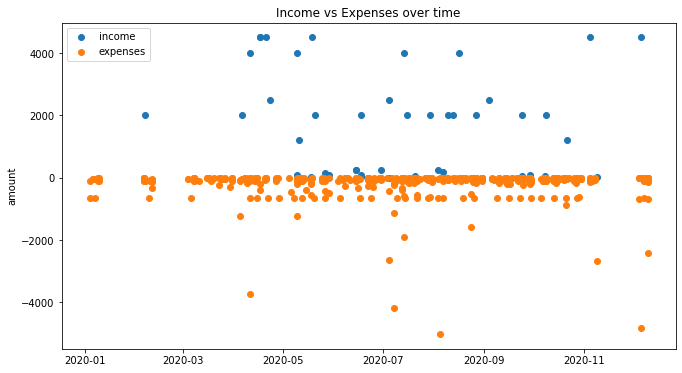

In [8]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.scatter(df["date"], df["in"], label = "income")
ax1.scatter(df["date"], df["out"], label = "expenses")
plt.ylabel('amount')
plt.title('Income vs Expenses over time')
plt.legend()
plt.show()

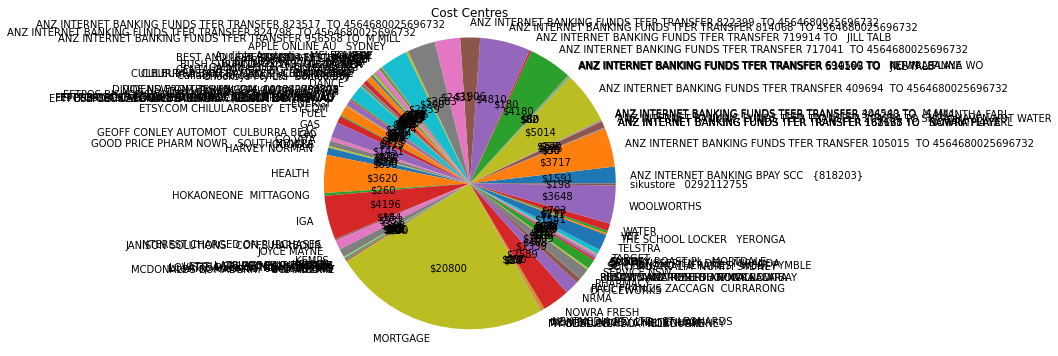

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plotdf = df.groupby("desc").sum().abs()
values = plotdf["out"]
labels = plotdf.index
amount_sum = plotdf["out"].sum()

def dollar_value(val):
    return f"${int(np.round(val/100*amount_sum))}"

fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(values, labels=plotdf.index, autopct=dollar_value)
ax1.axis('equal')
plt.title('Cost Centres')
plt.show()

In [10]:
df[df["in"]>0].groupby("desc").sum()

,amount,in,out
desc,,,
CW INCOME,43000.00,43000.00,0.0
DIVIDEND FROM TLS FNL DIV 001249794803,45.44,45.44,0.0
HEALTH,1030.42,1030.42,0.0
LATE PAYMENT FEE REV,20.00,20.00,0.0
MD INCOME,31900.00,31900.00,0.0
RID1915 ANZ REMEDIATION CREDIT,523.74,523.74,0.0
SONY AUSTRALIA NORTH SYDNEY,199.00,199.00,0.0
TARGET,18.00,18.00,0.0
THE SCHOOL LOCKER YERONGA,87.80,87.80,0.0


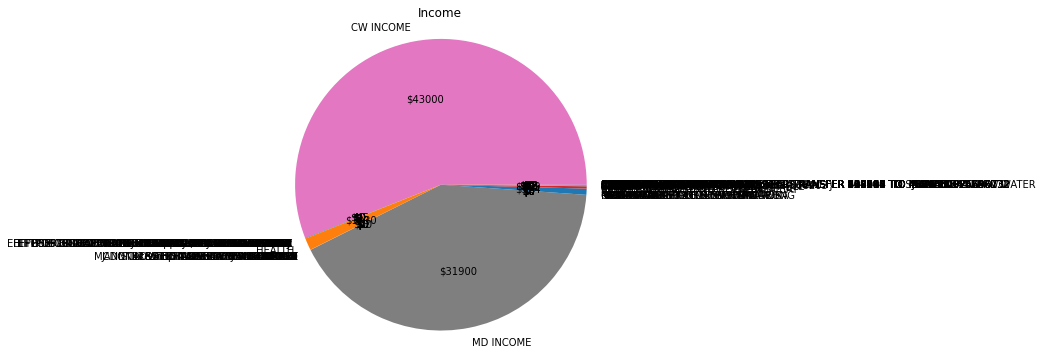

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plotdf = df.groupby("desc").sum().abs()
values = plotdf["in"]
labels = plotdf.index
amount_sum = plotdf["in"].sum()

def dollar_value(val):
    return f"${int(np.round(val/100*amount_sum))}"

fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(values, labels=plotdf.index, autopct=dollar_value)
ax1.axis('equal')
plt.title('Income')
plt.show()